# 1.Import required libraries and read the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('Apps_data+(1).csv')

# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features


In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4. Check if there are any duplicate records in the dataset? if any drop them

In [7]:
df.duplicated().sum()

483

In [8]:
df=df.drop_duplicates()
df.shape

(10358, 13)

# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [9]:
df['Category'].value_counts()

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [10]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [11]:
group=df.groupby('Category')

In [12]:
drop_group=group.get_group('1.9').index
drop_group

Index([10472], dtype='int64')

In [13]:
df.drop(drop_group)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [14]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [15]:
df=df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


In [17]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [18]:
df['Rating_Category']=df['Rating'].apply(lambda x: 'High' if x>3.5 else 'Low')

In [19]:
df.head(60)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,High
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,High
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,High
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,High
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,High


In [20]:
df.drop('Rating',axis=1,inplace=True)

In [21]:
df.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution

In [22]:
df['Rating_Category'].head()

0    High
1    High
2    High
3    High
4    High
Name: Rating_Category, dtype: object

# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [23]:
df['Reviews']=df['Reviews'].astype(float)

<Axes: >

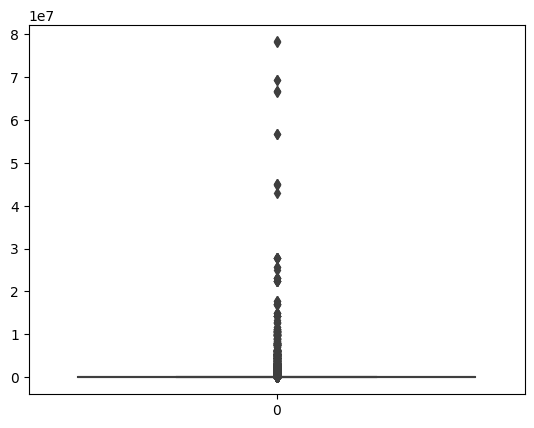

In [24]:
sns.boxplot(df['Reviews'])

In [25]:
df['Reviews']=np.log(df['Reviews'])

In [26]:
def remove_outliers(df):
    cols=list(df.columns)
    Q1=df[cols].quantile(0.25)
    Q3=df[cols].quamtile(0.75)
    IQR=Q3-Q1
    df=df[~((df[cols]<(Q1-1.5*IQR))|(df[cols]>(Q3+1.5*IQR)))]

{'whiskers': [<matplotlib.lines.Line2D at 0x2c651c2cad0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c651b25f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c65181cb10>],
 'medians': [<matplotlib.lines.Line2D at 0x2c651c2fa10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c651aed790>],
 'means': []}

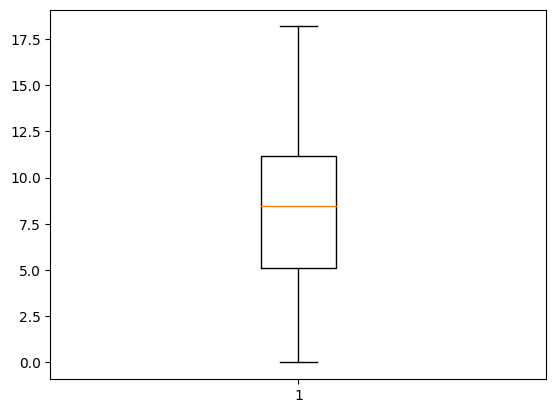

In [29]:
plt.boxplot(x=df['Reviews'])

In [30]:
df.head(10)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,5.068904,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,6.874198,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,11.379508,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,12.281384,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,6.874198,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
5,Paper flowers instructions,ART_AND_DESIGN,5.117994,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,High
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,5.181784,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,High
7,Infinite Painter,ART_AND_DESIGN,10.513661,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,High
8,Garden Coloring Book,ART_AND_DESIGN,9.531771,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,High
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.795791,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,High


## 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type

In [33]:
df['Size']=df['Size'].replace({'Varies with device':np.nan})
df["Size"]

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10834    2.6M
10836     53M
10837    3.6M
10839     NaN
10840     19M
Name: Size, Length: 8886, dtype: object

In [34]:
df['Size']=df['Size'].replace({np.nan:'0'})
df["Size"]

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10834    2.6M
10836     53M
10837    3.6M
10839       0
10840     19M
Name: Size, Length: 8886, dtype: object

In [35]:
df['Size']=df['Size'].replace({'M':'*1e6','k':'*1e3'},regex=True).map(pd.eval).astype(int)

In [36]:
mean=df['Size'].mean()
mean

19000655.911771327

In [37]:
df['Size']=df['Size'].astype(str)

In [38]:
df['Size']=df['Size'].replace({'0':mean})
df['Size']

0               19000000
1               14000000
2                8700000
3               25000000
4                2800000
              ...       
10834            2600000
10836           53000000
10837            3600000
10839    19000655.911771
10840           19000000
Name: Size, Length: 8886, dtype: object

In [39]:
df['Size']=df['Size'].astype(int)

In [40]:
df.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,5.068904,19000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,6.874198,14000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,11.379508,8700000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,12.281384,25000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,6.874198,2800000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


## 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type

In [41]:
df['Installs']=df['Installs'].str.replace('+','').str.replace(',','').astype(int)
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8886, dtype: int32

In [46]:
df.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,5.068904,19000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,6.874198,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,11.379508,8700000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,12.281384,25000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,6.874198,2800000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


## 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type

In [47]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [48]:
df['Price']=df['Price'].str.replace('$','').astype(float)

In [54]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

## 12. Drop the columns which you think redundant for the analysis.

In [58]:
drop_cols=['App' ,'Genres','Last Updated','Current Ver','Android Ver']

In [59]:
df=df.drop(drop_cols,axis=1)
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category
0,ART_AND_DESIGN,5.068904,19000000,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.874198,14000000,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379508,8700000,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.281384,25000000,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,6.874198,2800000,100000,Free,0.0,Everyone,High
...,...,...,...,...,...,...,...,...
10834,FAMILY,1.945910,2600000,500,Free,0.0,Everyone,High
10836,FAMILY,3.637586,53000000,5000,Free,0.0,Everyone,High
10837,FAMILY,1.386294,3600000,100,Free,0.0,Everyone,High
10839,BOOKS_AND_REFERENCE,4.736198,19000655,1000,Free,0.0,Mature 17+,High


## 13. Encode the categorical columns.

In [64]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Category']=labelencoder.fit_transform(df['Category'])
df['Content Rating']=labelencoder.fit_transform(df['Content Rating'])

In [62]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [65]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category
0,0,5.068904,19000000,10000,Free,0.0,1,High
1,0,6.874198,14000000,500000,Free,0.0,1,High
2,0,11.379508,8700000,5000000,Free,0.0,1,High
3,0,12.281384,25000000,50000000,Free,0.0,4,High
4,0,6.874198,2800000,100000,Free,0.0,1,High


In [72]:
df['Category'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 15, 16, 17, 18,
       14, 11, 20, 27, 26, 24, 28, 30, 29, 23, 25, 22, 32, 31, 21, 19])

## 14. Segregate the target and independent features

In [73]:
from sklearn.preprocessing import OneHotEncoder
hotencoder=OneHotEncoder()
encoding=hotencoder.fit_transform(df['Category'].values.reshape(-1,1)).toarray()
encoding1=hotencoder.fit_transform(df['Content Rating'].values.reshape(-1,1)).toarray()

In [75]:
encoding.shape

(8886, 33)

In [76]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category
0,0,5.068904,19000000,10000,Free,0.0,1,High
1,0,6.874198,14000000,500000,Free,0.0,1,High
2,0,11.379508,8700000,5000000,Free,0.0,1,High
3,0,12.281384,25000000,50000000,Free,0.0,4,High
4,0,6.874198,2800000,100000,Free,0.0,1,High


In [77]:
df_encoded=pd.DataFrame(encoding,columns=['Category_'+str(int(i)) for i in range(encoding.shape[1])])
df_encoded1=pd.DataFrame(encoding1,columns=['Content Rating'+str(int(i))for i in range(encoding1.shape[1])])

In [79]:
df_encoded.head()

,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,...,Category_23,Category_24,Category_25,Category_26,Category_27,Category_28,Category_29,Category_30,Category_31,Category_32
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
df['Type']=df['Type'].str.replace('Free','0')
df['Type']=df['Type'].str.replace('Paid','1')
df['Type'].astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Type, Length: 8886, dtype: int32

In [84]:
df=pd.concat([df,df_encoded,df_encoded1],axis=1)

In [91]:
df=df.dropna()
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category,Category_0,Category_1,...,Category_29,Category_30,Category_31,Category_32,Content Rating0,Content Rating1,Content Rating2,Content Rating3,Content Rating4,Content Rating5
0,0.0,5.068904,19000000.0,10000.0,0,0.00,1.0,High,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,6.874198,14000000.0,500000.0,0,0.00,1.0,High,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,11.379508,8700000.0,5000000.0,0,0.00,1.0,High,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,12.281384,25000000.0,50000000.0,0,0.00,4.0,High,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,6.874198,2800000.0,100000.0,0,0.00,1.0,High,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8878,28.0,13.570920,19000655.0,10000000.0,0,0.00,1.0,High,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8879,14.0,8.372861,19000655.0,100000.0,1,2.99,2.0,High,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8880,14.0,11.830200,51000000.0,5000000.0,0,0.00,1.0,High,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8881,15.0,3.784190,49000000.0,1000.0,0,0.00,1.0,Low,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [96]:
X=df.drop('Rating_Category',axis=1)
y=df['Rating_Category']

In [97]:
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category,Category_0,Category_1,...,Category_29,Category_30,Category_31,Category_32,Content Rating0,Content Rating1,Content Rating2,Content Rating3,Content Rating4,Content Rating5
0,0.0,5.068904,19000000.0,10000.0,0,0.00,1.0,High,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,6.874198,14000000.0,500000.0,0,0.00,1.0,High,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,11.379508,8700000.0,5000000.0,0,0.00,1.0,High,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,12.281384,25000000.0,50000000.0,0,0.00,4.0,High,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,6.874198,2800000.0,100000.0,0,0.00,1.0,High,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8878,28.0,13.570920,19000655.0,10000000.0,0,0.00,1.0,High,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8879,14.0,8.372861,19000655.0,100000.0,1,2.99,2.0,High,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8880,14.0,11.830200,51000000.0,5000000.0,0,0.00,1.0,High,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8881,15.0,3.784190,49000000.0,1000.0,0,0.00,1.0,Low,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 15. Split the dataset into train and test.


In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=30,random_state=25)

In [99]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(7347, 46) (30, 46)
(7347,) (30,)


## 16. Standardize the data, so that the values are within a particular range

In [100]:
from sklearn.preprocessing import StandardScaler
std_scal=StandardScaler()
std_scal

StandardScaler()

In [101]:
df['Reviews_val']=std_scal.fit_transform(df[['Reviews']])

In [102]:
df['Reviews_val']

0      -0.895347
1      -0.429428
2       0.733321
3       0.966081
4      -0.429428
          ...   
8878    1.298890
8879   -0.042647
8880    0.849638
8881   -1.226911
8883   -1.457592
Name: Reviews_val, Length: 7377, dtype: float64